### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

### Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Open dataset

In [ ]:
path = '/content/drive/MyDrive/diabetes-cleaned.csv'
df = pd.read_csv(path)



EDA

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,88,30,42,99,55.0,0.496,26,1
1,0,137,40,35,168,43.1,2.288,33,1
2,1,128,48,45,194,40.5,0.613,24,1
3,3,78,50,32,88,31.0,0.248,26,1
4,6,119,50,22,176,27.1,1.318,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,133,102,28,140,32.8,0.234,45,1
256,8,167,106,46,231,37.6,0.165,43,1
257,10,68,106,23,49,35.5,0.285,47,0
258,9,171,110,24,240,45.4,0.721,54,1
259,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       88             30             42       99  55.0   
1              0      137             40             35      168  43.1   
2              1      128             48             45      194  40.5   
3              3       78             50             32       88  31.0   
4              6      119             50             22      176  27.1   
..           ...      ...            ...            ...      ...   ...   
255            1      133            102             28      140  32.8   
256            8      167            106             46      231  37.6   
257           10       68            106             23       49  35.5   
258            9      171            110             24      240  45.4   
259            0      129            110             46      130  67.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.496  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               260 non-null    int64  
 1   Glucose                   260 non-null    int64  
 2   BloodPressure             260 non-null    int64  
 3   SkinThickness             260 non-null    int64  
 4   Insulin                   260 non-null    int64  
 5   BMI                       260 non-null    float64
 6   DiabetesPedigreeFunction  260 non-null    float64
 7   Age                       260 non-null    int64  
 8   Outcome                   260 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.4 KB


In [ ]:
df.shape

(260, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

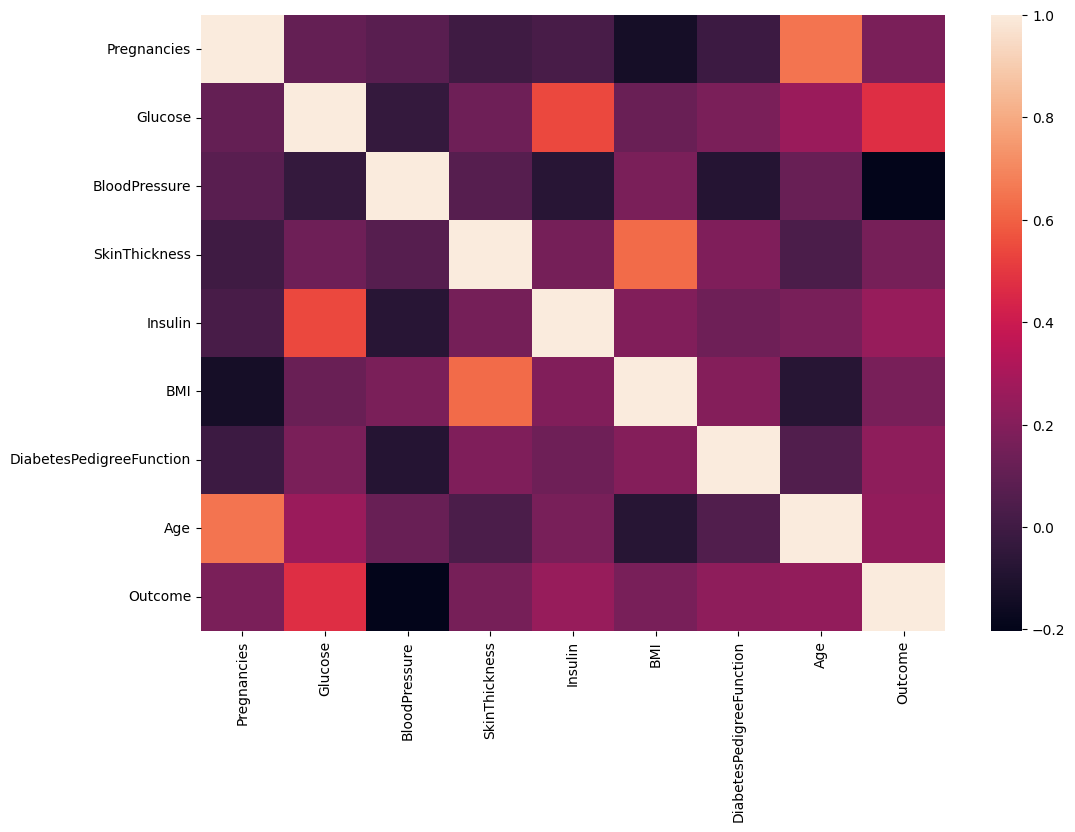

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr())

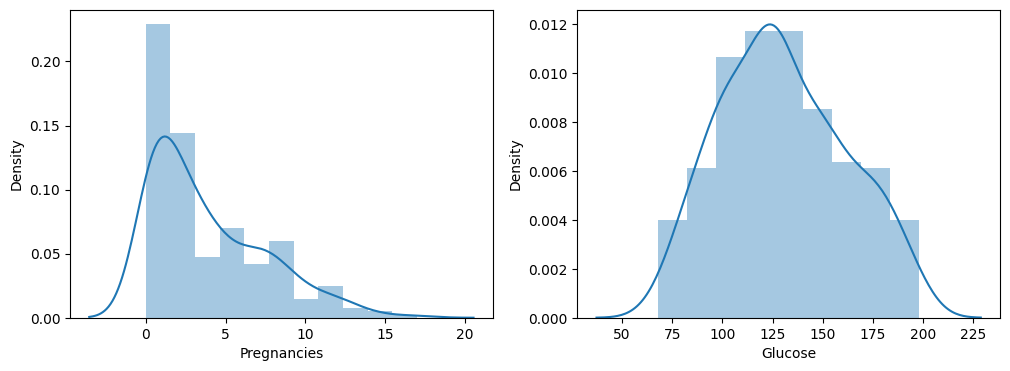

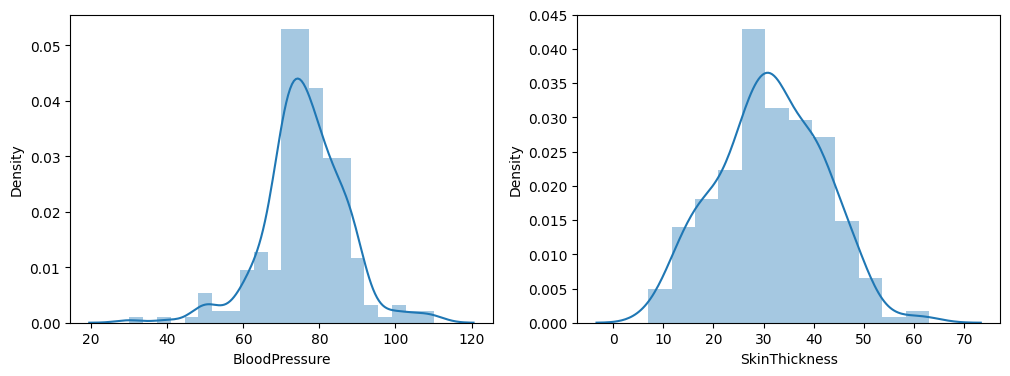

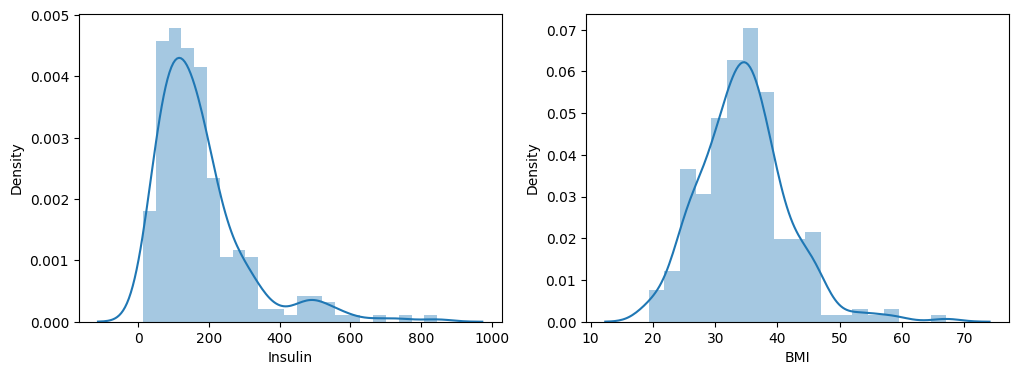

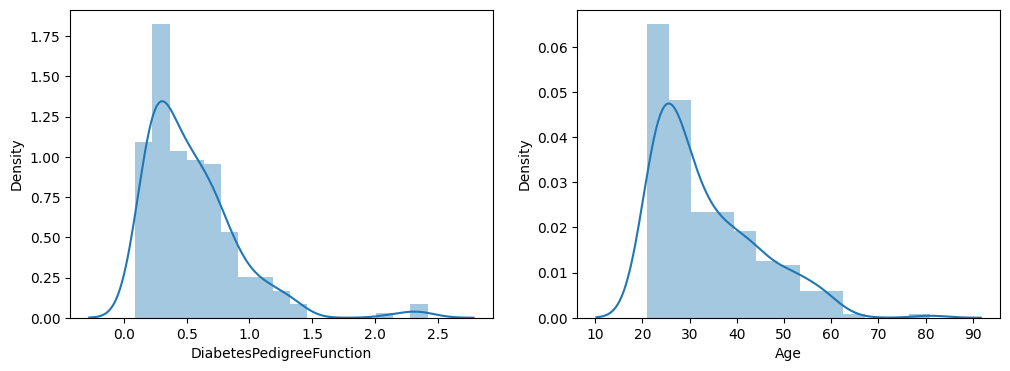

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['Pregnancies'])
plt.subplot(1,2,2)
sns.distplot(df['Glucose'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['BloodPressure'])
plt.subplot(1,2,2)
sns.distplot(df['SkinThickness'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['Insulin'])
plt.subplot(1,2,2)
sns.distplot(df['BMI'])
plt.show()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=5):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
model_namess, modelss = get_validators()
accuracy = cross_validate(model_namess, modelss, X_train, y_train, 'Diabetes')
accuracy

,Neural Network,Logistic Regression,Support Vector Machine,Ada Boost Classifier,Gradient Boosting Classifier,K-Nearest Neighbors,Gaussian Naive Bayes,Extra Trees,Random Forest,Decision Tree,XGB Classifier
Diabetes CV_0,0.619,0.786,0.786,0.738,0.786,0.667,0.738,0.762,0.786,0.738,0.786
Diabetes CV_1,0.857,0.738,0.810,0.786,0.833,0.786,0.762,0.762,0.833,0.857,0.857
Diabetes CV_2,0.643,0.643,0.643,0.786,0.786,0.690,0.667,0.667,0.786,0.714,0.738
Diabetes CV_3,0.829,0.756,0.780,0.805,0.805,0.683,0.756,0.707,0.780,0.878,0.756
Diabetes CV_4,0.780,0.683,0.659,0.829,0.683,0.634,0.707,0.780,0.732,0.610,0.659


In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = ExtraTreesClassifier()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('Decision Tree Classifier', clf1), ('Extra Tree Classifier', clf2), ('XGB', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.96      0.87      0.91        30

    accuracy                           0.90        52
   macro avg       0.90      0.91      0.90        52
weighted avg       0.91      0.90      0.90        52



In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
              ]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.8461538461538461
LogisticRegression : 0.8269230769230769
ExtraTreesClassifier : 0.8269230769230769
DecisionTree : 0.8653846153846154
RandomForest : 0.8653846153846154
Naive Bayes : 0.8269230769230769
KNeighbours : 0.75
SVM : 0.8269230769230769
AdaBoostClassifier : 0.8461538461538461
GradientBoostingClassifier:  0.8653846153846154
XGB : 0.8461538461538461
